
### I will be working with [911 emergency call Data Set from Kaggle](https://www.kaggle.com/mchirico/montcoalert). I will explore these main questions:


###### What are the reasons for most 911 calls? 
###### Which months, days, hours, and date mostly calls happen? 
###### what are top 10 towns for 911 calls?
###### What are the top 5 zipcodes for 911 calls?




### Import Libraries

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [88]:
df = pd.read_csv('911 call.csv')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [90]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [91]:
df.drop('e', axis=1, inplace=True)

In [92]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          52129
title            0
timeStamp        0
twp            159
addr             0
dtype: int64

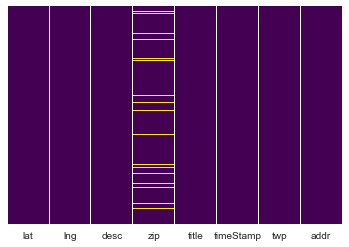

In [93]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False, cmap = 'viridis')

#### What is the reason for most calls?

In [94]:
# create new column 'reasons'
df['reasons'] = df['title'].apply(lambda x:x.split(':')[0])

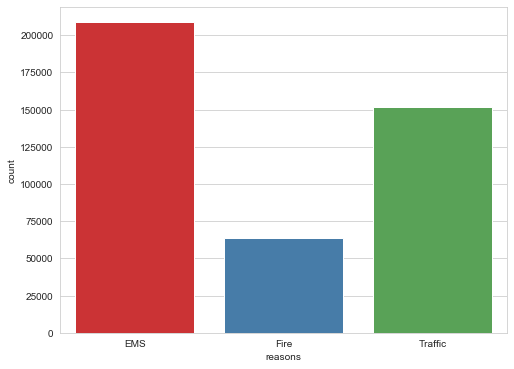

In [95]:
plt.figure(figsize = (8, 6))
sns.countplot(x='reasons',data=df, palette='Set1')

In [96]:
type('timeStamp')

str

### Explore when the most calls usually hapen
#### Converting the column timeStamp from strings to DateTime objects

In [97]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null datetime64[ns]
twp          423750 non-null object
addr         423909 non-null object
reasons      423909 non-null object
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 29.1+ MB


In [99]:
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)

In [100]:
df['month'] = df['timeStamp'].apply(lambda time:time.month)

In [101]:
df['day of week'] = df['timeStamp'].apply(lambda time:time.dayofweek)

In [102]:
mapd = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [103]:
df['day of week'] = df['day of week'].map(mapd)

In [104]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,reasons,Hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,16,12,Thu


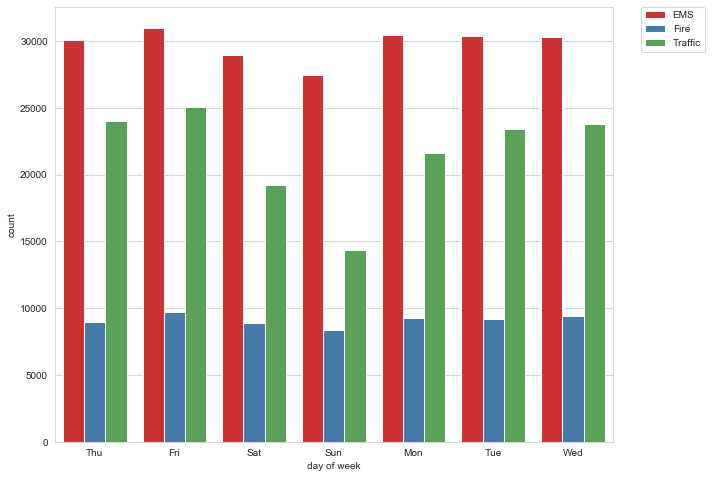

In [105]:
plt.figure(figsize = (10, 8))
sns.countplot(x='day of week',data=df,hue='reasons', palette='Set1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [106]:
byMonth = df.groupby('month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,reasons,Hour,day of week
month,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828
3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666
4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583
5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644


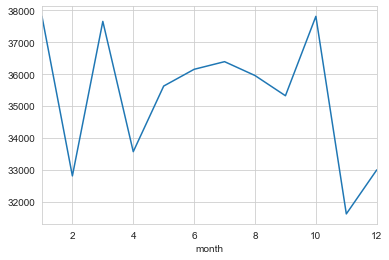

In [107]:
byMonth['twp'].plot()

In [108]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

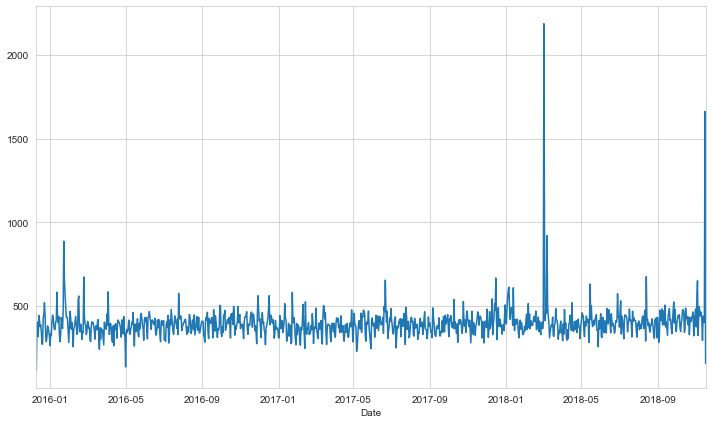

In [109]:
plt.figure(figsize = (10,6))
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

#### ** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

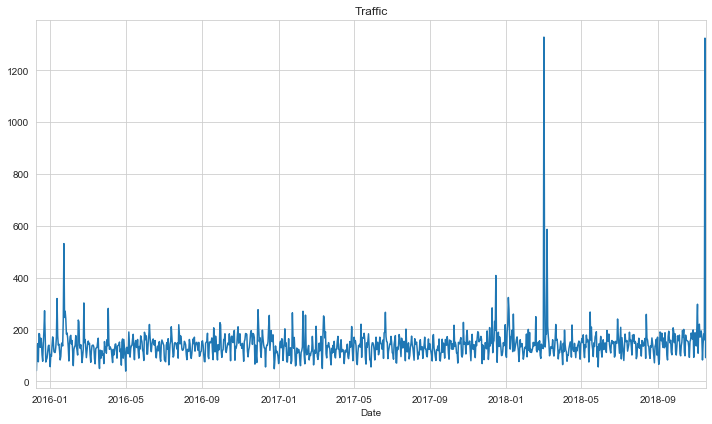

In [110]:
plt.figure(figsize = (10,6))
df[df['reasons']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

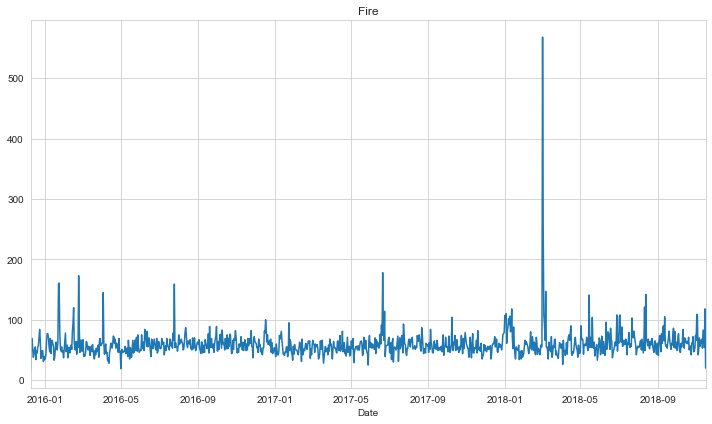

In [111]:
plt.figure(figsize = (10,6))
df[df['reasons']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

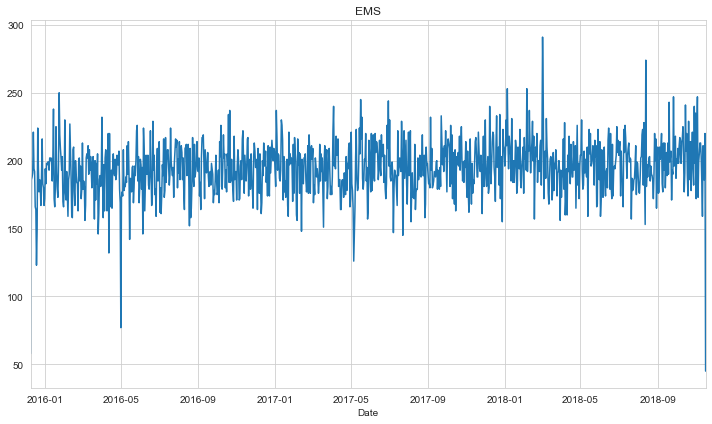

In [112]:
plt.figure(figsize = (10,6))
df[df['reasons']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

#### Creating heatmaps with seaborn :  We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. 

In [113]:
dayHour = df.groupby(by=['day of week','Hour']).count()['reasons'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,1185,1001,930,832,821,1051,1676,2689,3185,3295,...,4150,4514,4711,4489,3616,3254,2789,2445,2210,1866
Mon,1207,974,857,784,871,1124,1729,2829,3588,3685,...,3547,3975,4063,4003,3512,2821,2418,2005,1698,1283
Sat,1515,1332,1206,1012,936,985,1230,1640,2211,2766,...,3479,3284,3348,3274,3174,3036,2632,2432,2073,1913
Sun,1520,1331,1263,1033,954,941,1119,1568,1933,2421,...,2992,2828,2855,2872,2829,2679,2362,1994,1632,1470
Thu,1115,873,920,775,784,1091,1801,2913,3468,3457,...,3904,4139,4053,4412,3578,2923,2579,2230,1784,1486


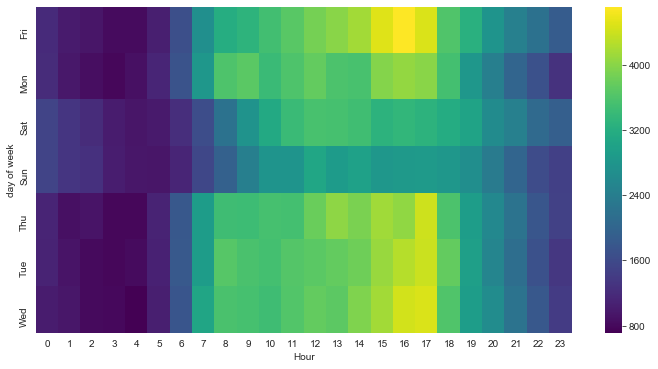

In [114]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

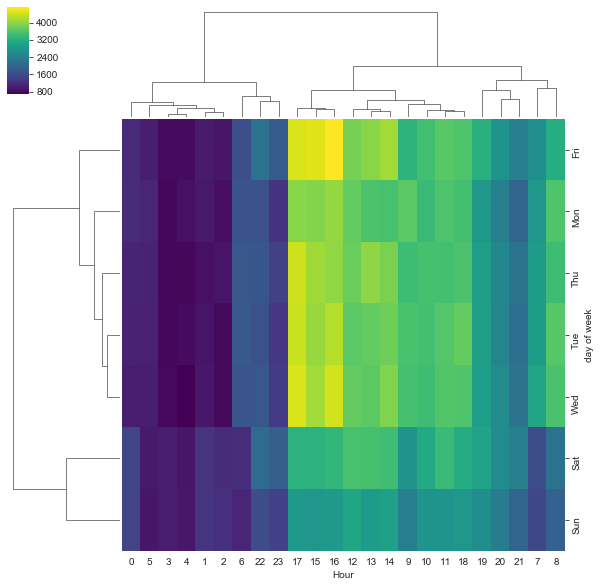

In [122]:
# clustring with heatmap
sns.clustermap(dayHour,cmap='viridis')

#### Creating heatmaps with seaborn :  We'll first need to restructure the dataframe so that the columns become the month and the Index becomes the Day of the Week. 

In [116]:
dayMonth = df.groupby(by=['day of week','month']).count()['reasons'].unstack()
dayMonth.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
day of week,,,,,,,,,,,,
Fri,5532,4848,7344,5195,4989,5867,5380,5312,6010,5179,4525,5570
Mon,5716,5214,4663,5154,5019,5045,5792,5212,4675,6385,4157,4286
Sat,5103,4431,4914,4947,4275,4868,4883,4355,5023,5051,4043,5200
Sun,4882,3806,3569,4628,3940,4019,5114,3963,4245,4852,3210,3896
Thu,4985,4708,6010,4637,5469,5951,4954,5328,5300,4940,5978,4899


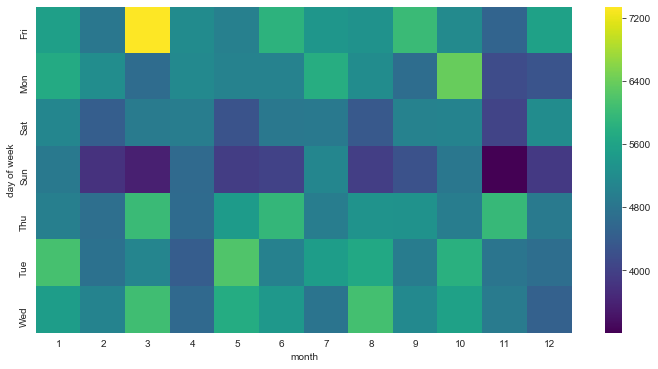

In [117]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

#### Top 10 town (twp) for 911 calls

In [119]:
df.twp.value_counts().head(10)

LOWER MERION        36441
ABINGTON            25835
NORRISTOWN          23883
UPPER MERION        22694
CHELTENHAM          19629
POTTSTOWN           17500
UPPER MORELAND      14707
LOWER PROVIDENCE    14025
PLYMOUTH            12800
UPPER DUBLIN        11910
Name: twp, dtype: int64

<BarContainer object of 10 artists>

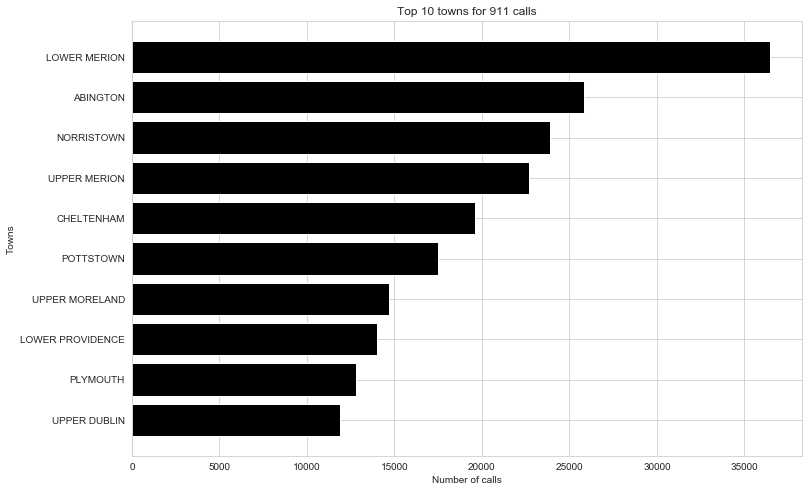

In [123]:
data = df.twp.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Top 10 towns for 911 calls")
plt.ylabel("Towns")
plt.xlabel("Number of calls")

plt.barh(x, y, color = 'black')

#### What are the top 5 zipcodes for 911 calls?

In [121]:
df['zip'].value_counts().head(5)

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64